In [25]:
import pandas as pd 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [15]:
df = pd.read_csv('airlines.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6162 entries, 0 to 6161
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Airline ID  6162 non-null   int64 
 1   Name        6162 non-null   object
 2   Alias       5656 non-null   object
 3   IATA        1535 non-null   object
 4   ICAO        6075 non-null   object
 5   Callsign    5354 non-null   object
 6   Country     6147 non-null   object
 7   Active      6162 non-null   object
dtypes: int64(1), object(7)
memory usage: 385.2+ KB


# EDA

<Figure size 1200x600 with 0 Axes>

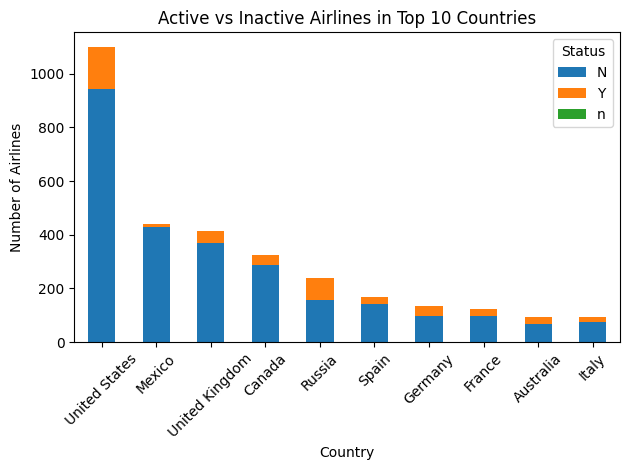

In [16]:
# 1. Question: What is the distribution of active vs inactive airlines by country?
plt.figure(figsize=(12, 6))
active_by_country = df.groupby(['Country', 'Active']).size().unstack()
top_10_countries = active_by_country.sum(axis=1).sort_values(ascending=False).head(10).index

active_by_country.loc[top_10_countries].plot(kind='bar', stacked=True)
plt.title('Active vs Inactive Airlines in Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Airlines')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()
plt.show()



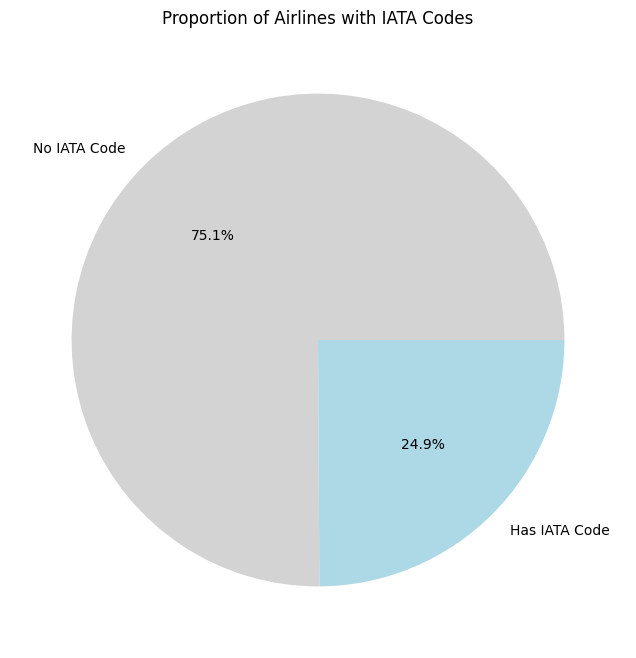

In [19]:
# 2. Question: What percentage of airlines have IATA codes?
plt.figure(figsize=(8, 8))
iata_status = df['IATA'].notna().value_counts()
plt.pie(iata_status, labels=['No IATA Code', 'Has IATA Code'], 
        autopct='%1.1f%%', colors=['lightgray', 'lightblue'])
plt.title('Proportion of Airlines with IATA Codes')
plt.show()





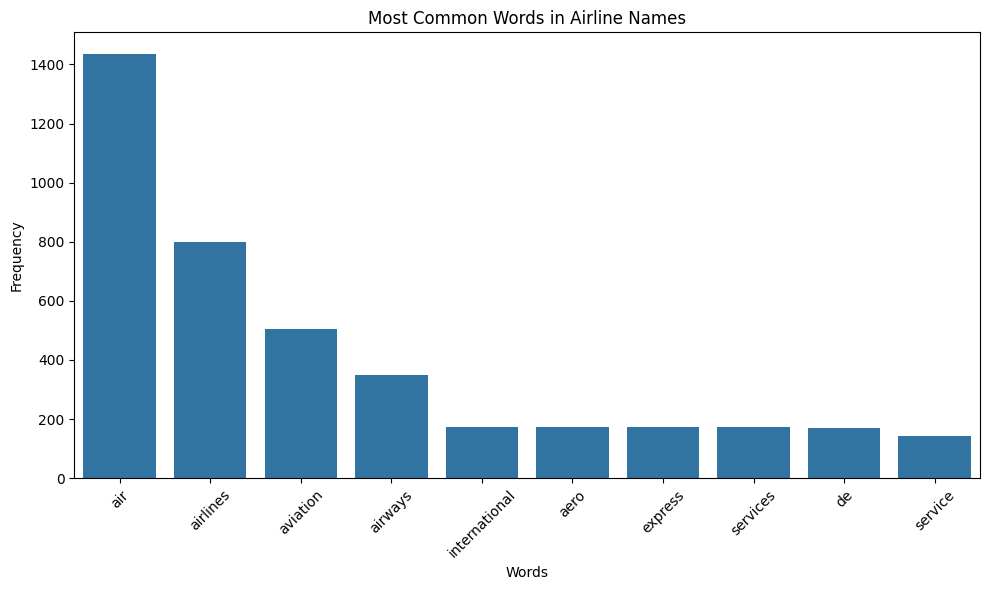

In [21]:
# 3. Question: What are the most common words in airline names?
from collections import Counter
import re

def get_common_words(names):
    words = ' '.join(names).lower()
    words = re.findall(r'\w+', words)
    return Counter(words).most_common(10)

common_words = get_common_words(df['Name'])
words, counts = zip(*common_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(words), y=list(counts))
plt.title('Most Common Words in Airline Names')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:

print("\nKey Insights:")
print(f"1. Total number of airlines: {len(df)}")
print(f"2. Number of active airlines: {len(df[df['Active'] == 'Y'])}")
print(f"3. Number of countries with airlines: {df['Country'].nunique()}")
print("\nTop 5 countries by number of airlines:")
print(df['Country'].value_counts().head())



Key Insights:
1. Total number of airlines: 6162
2. Number of active airlines: 1255
3. Number of countries with airlines: 277

Top 5 countries by number of airlines:
Country
United States     1099
Mexico             440
United Kingdom     414
Canada             323
Russia             238
Name: count, dtype: int64
